# **House Prices - Advanced Regression Techniques**


---


## **Introduction**
*The prediction of house prices is a fundamental problem in the field of real estate and finance. Accurately estimating the value of a house is crucial for various stakeholders, such as buyers, sellers, and financial institutions. In this Jupyter notebook, we aim to tackle this challenge by applying advanced regression techniques to predict house prices based on a set of given features.*


---


## **Dataset**
*The dataset used for this task is the "[House Prices: Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)" dataset, provided by Kaggle. It consists of a comprehensive set of features describing various aspects of residential properties, such as the size, location, condition, and amenities. The dataset includes both numerical and categorical features, offering a diverse range of information to capture the complexity of house pricing.*


---


## **Objective**
*The primary objective of this project is to develop a robust regression model that accurately predicts house prices based on the available features. We will explore the dataset, perform data preprocessing, conduct feature engineering, and experiment with different regression algorithms. The evaluation of the models will be based on appropriate performance metrics, such as mean squared error (MSE), root mean squared error (RMSE) and more.*


---



## **Methodology**
*Our approach involves several key steps:*

1. Data loading and exploration:
    > We will load the dataset and gain initial insights into its structure, feature types, and statistics. This step allows us to familiarize ourselves with the data and identify potential challenges or areas for improvement.
2. Data preprocessing:
    > We will address missing values, handle outliers, and perform necessary data transformations. This step aims to prepare the dataset for modeling by ensuring data quality and compatibility.
3. Feature engineering:
    > We will create new features, combine existing ones, and encode categorical variables to extract meaningful information and enhance the predictive power of the model.
4. Model training and evaluation:
    > We will train various regression models using the prepared dataset. We will employ advanced regression techniques such as linear regression, decision trees, random forests, or gradient boosting algorithms. The models will be evaluated using appropriate evaluation metrics (RMSE) required by the challenge organisers.
5. Model selection:
    > Based on the performance of the models, we will select the most suitable one to achieve optimal results with the training data.
6. Prediction and submission:
    > Once the final model is trained and optimized, we will make predictions on the unseen test data and prepare the submission file in the required format.


---


## **Conclusion**
*By the end of this project, we aim to develop an accurate regression model that can effectively predict house prices based on the given features. Through data exploration, preprocessing, feature engineering, and model training, we strive to gain valuable insights into the factors influencing house prices and contribute to the field of real estate prediction.*

In [ ]:
# Remember to pip install any packages which you don't have locally.

In [ ]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import datetime

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from mlxtend.regressor import StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import BayesianRidge, ElasticNet, Lasso, LassoLarsIC, Ridge, RidgeCV, LassoCV, LassoLarsCV, SGDRegressor

In [ ]:
# pandas jupyter setup
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
# Google Drive setup
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading data in Google Colab
train_data = pd.read_csv('/content/drive/MyDrive/project/houses/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/project/houses/test.csv')

In [ ]:
# Loading data if running locally.
# train_data = pd.read_csv('train.csv')
# test_data = pd.read_csv('test.csv')

In [ ]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.00,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1379.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,730.50,56.90,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,567.24,1057.43,1162.63,346.99,5.84,1515.46,0.43,0.06,1.57,0.38,2.87,1.05,6.52,0.61,1978.51,1.77,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.20
std,421.61,42.30,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.63,0.64,24.69,0.75,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.50
min,1.00,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
25%,365.75,20.00,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,1129.50,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1961.00,1.00,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.00
50%,730.50,50.00,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,477.50,991.50,1087.00,0.00,0.00,1464.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1980.00,2.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.00
75%,1095.25,70.00,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,808.00,1298.25,1391.25,728.00,0.00,1776.75,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2002.00,2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.00
max,1460.00,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,2336.00,6110.00,4692.00,2065.00,572.00,5642.00,3.00,2.00,3.00,2.00,8.00,3.00,14.00,3.00,2010.00,4.00,1418.00,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.00


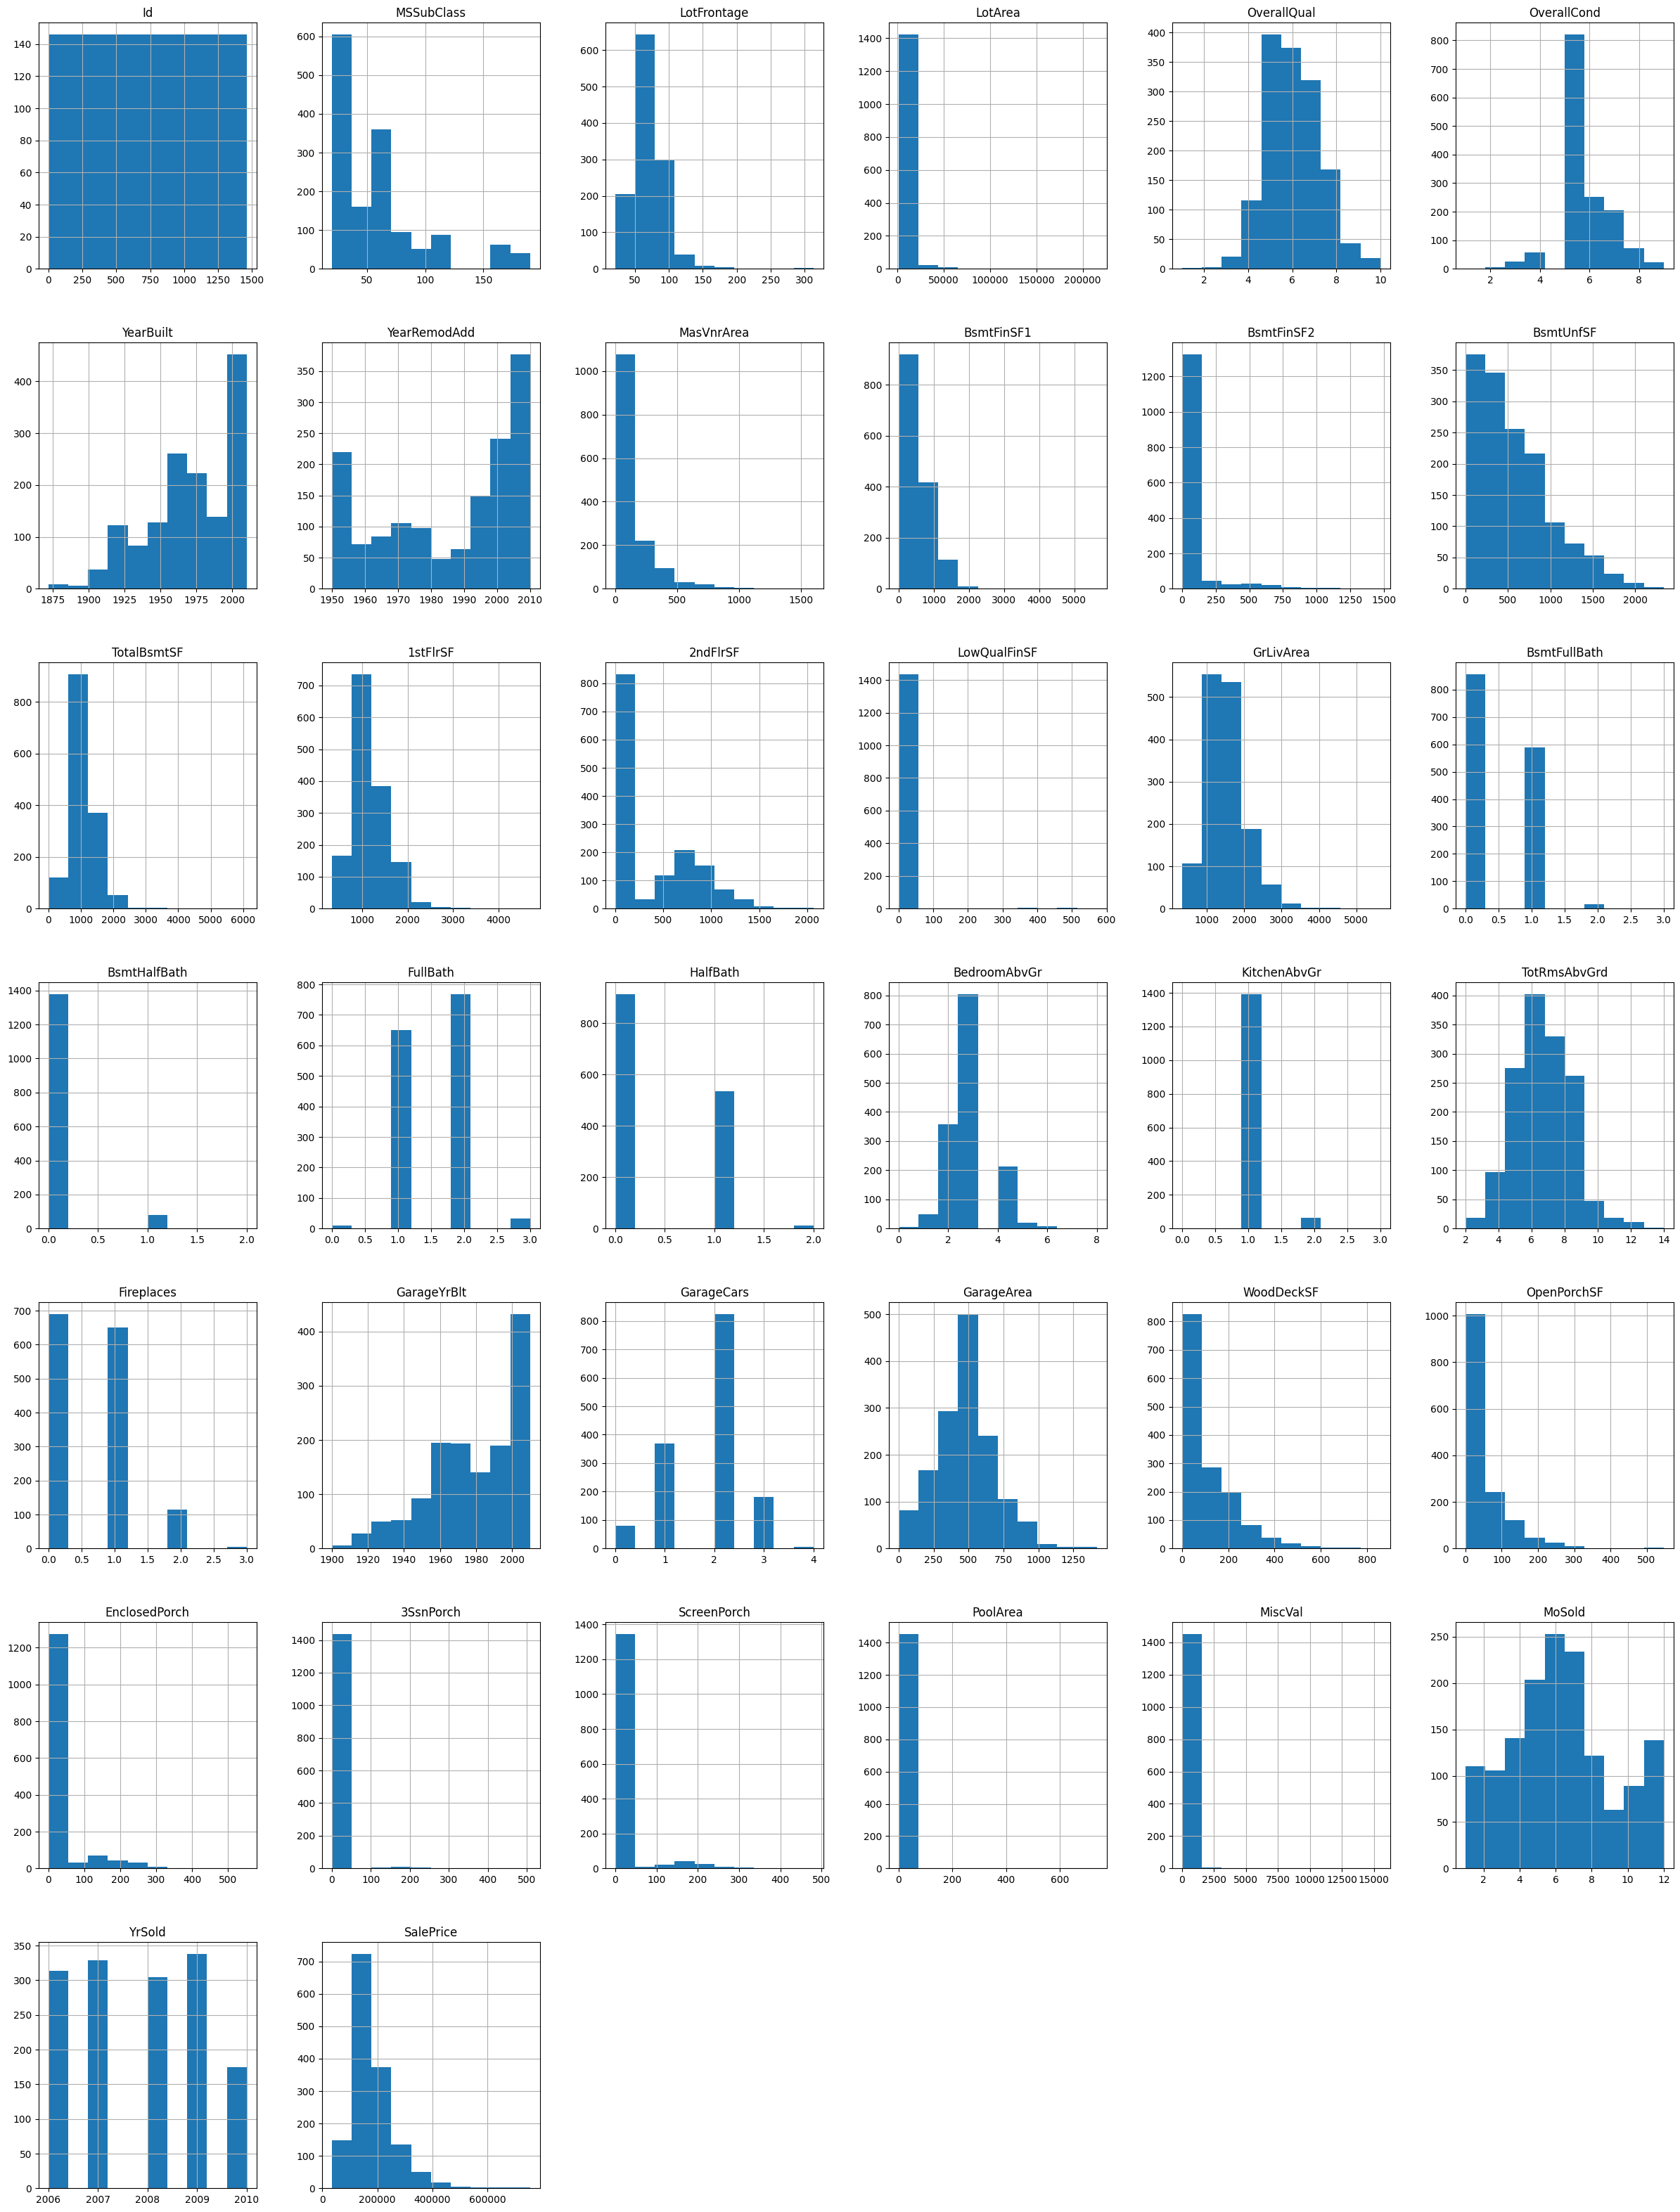

In [ ]:
train_data.hist(figsize=(30,40));

In [ ]:
# train_data.corr()

In [ ]:
# plt.figure(figsize=(40,30))
# sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [ ]:
numeric_columns = [col for col in train_data.columns if train_data[col].dtype in ['int64', 'float64']]

In [ ]:
# Check for placeholder and null values respectively per column.
def check_null_and_placeholder(df):
    col_dict = {}
    for col in df.columns:
        null_count = df[col].isnull().sum()
        placeholder_count = df[df[col].isin(['0', 0])].shape[0]
        col_dict[col] = [placeholder_count, null_count]
    return col_dict

In [ ]:
check_null_and_placeholder(train_data[numeric_columns])

{'Id': [0, 0],
 'MSSubClass': [0, 0],
 'LotFrontage': [0, 259],
 'LotArea': [0, 0],
 'OverallQual': [0, 0],
 'OverallCond': [0, 0],
 'YearBuilt': [0, 0],
 'YearRemodAdd': [0, 0],
 'MasVnrArea': [861, 8],
 'BsmtFinSF1': [467, 0],
 'BsmtFinSF2': [1293, 0],
 'BsmtUnfSF': [118, 0],
 'TotalBsmtSF': [37, 0],
 '1stFlrSF': [0, 0],
 '2ndFlrSF': [829, 0],
 'LowQualFinSF': [1434, 0],
 'GrLivArea': [0, 0],
 'BsmtFullBath': [856, 0],
 'BsmtHalfBath': [1378, 0],
 'FullBath': [9, 0],
 'HalfBath': [913, 0],
 'BedroomAbvGr': [6, 0],
 'KitchenAbvGr': [1, 0],
 'TotRmsAbvGrd': [0, 0],
 'Fireplaces': [690, 0],
 'GarageYrBlt': [0, 81],
 'GarageCars': [81, 0],
 'GarageArea': [81, 0],
 'WoodDeckSF': [761, 0],
 'OpenPorchSF': [656, 0],
 'EnclosedPorch': [1252, 0],
 '3SsnPorch': [1436, 0],
 'ScreenPorch': [1344, 0],
 'PoolArea': [1453, 0],
 'MiscVal': [1408, 0],
 'MoSold': [0, 0],
 'YrSold': [0, 0],
 'SalePrice': [0, 0]}

#### Takeaway

For columns where there are a large number of 0 values, we will consider dropping or feature engineering those columns as they are undescriptive for the task and heavily skew the data at hand.

In [ ]:
train_data_copy = train_data.copy()

In [ ]:
def get_missing(data):
    missing_sum = data.isna().sum()

    # Filter the columns that have missing values
    cols_with_missing_data = missing_sum[missing_sum > 0]

    # Select the columns from the original DataFrame
    filtered_data = data[cols_with_missing_data.index]

    # Calculate the sum of missing values for the filtered columns
    missing_sum_filtered = filtered_data.isna().sum()
    return missing_sum_filtered

In [ ]:
def impute(df, columns=None):
    if columns is None:
        columns = df.select_dtypes(include=['int64','float64']).columns.tolist()

    # Calculate the median for the specified column
    for col in columns:
        median_value = df[col].median()

        # Replace missing values in the specified column with the median value
        df[col].fillna(median_value, inplace=True)

    return df

In [ ]:
def impute_categoric(df, columns=None):
    if columns is None:
        columns = df.select_dtypes(include='object').columns.tolist()
    mode_value = df[columns].mode().iloc[0]
    df[columns] = df[columns].fillna(mode_value)
    return df

In [ ]:
train_data_imputed = impute(train_data_copy, ['LotFrontage'])

In [ ]:
train_data_imputed = impute_categoric(train_data_imputed, ['BsmtQual', 'BsmtCond'])

In [ ]:
get_missing(train_data_imputed)

Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [ ]:
train_data_imputed.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
def basic_encode(data):
  qual_spec = {
      'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: 0
  }
  cols_to_encode = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'KitchenQual']
  for col in cols_to_encode:
    data[col] = data[col].replace(qual_spec)
  return data

In [ ]:
train_data_encoded = basic_encode(train_data_imputed)

**Feature Engineering**

- TotalLotArea: Combines the 'LotFrontage' and the 'LotArea' features.
- OverallQC: Combines 'OverallQual' and 'OverallCond' to create an Overall Quality/Condition rating.
- ExterQC: Same purpose as OverallQC but for External Quality/Condition
- BsmtQC: Same purpose as OverallQC but for Basement Quality/Condition
- TotalBathrooms: Totals the number of bathrooms: both full and half in the entire house.
- TotalPorchArea: Combines all porch related features.
- TotalArea: Combines all ground living area: basement + above ground.
- Age: Calculates the age of the house since last sale.
- Remodeled: Binary column stating whether the house has been remodelled.
- HasGarage: Binary column stating whether the house has a garage.
- HasPool: Binary column stating whether the house has a pool.
- HasFireplace: Binary column stating whether the house has a fireplace.
- HouseStyleSimplified: Re-formatted 'HouseStyle' feature.
- LotSizeCategory: Categorises 'LotArea' into bins by scale: ['small': 1, 'medium': 2, 'large': 3]
- HasFence: Binary column stating whether the house has a fence.
- MoSold_sin: sin transformation used to encode the cyclic nature of the months of the year into numerical features.
- MoSold_cos: cosine transformation used to encode the cyclic nature of the months of the year into numerical features.

In [ ]:
def new_features(data):
    # TotalLotArea
    data['TotalLotArea'] = data['LotFrontage'] + data['LotArea']

    # overall quality and condition of house
    data['OverallQC'] = ((data['OverallQual'] + data['OverallCond']) / 2)

    # overall quality and condition of house
    data['ExterQC'] = ((data['ExterQual'] + data['ExterCond']) / 2)

    # overall quality and condition of house
    data['BsmtQC'] = ((data['BsmtQual'] + data['BsmtCond']) / 2)

    # Create new feature: TotalBathrooms
    data['TotalBathrooms'] = data['FullBath'] + (0.5 * data['HalfBath']) + \
        data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath'])

    # Create new feature: TotalPorchArea
    data['TotalPorchArea'] = data['OpenPorchSF'] + data['EnclosedPorch'] + \
        data['3SsnPorch'] + data['ScreenPorch']

    # Create new feature: TotalArea
    data['TotalArea'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

    # Create new feature: Age
    data['Age'] = data['YrSold'] - data['YearBuilt']
    # Set Age to 0 if YrSold is lower than YearBuilt
    data.loc[data['Age'] < 0, 'Age'] = 0

    # Create new feature: Remodeled (1 if the house has been remodeled, 0 otherwise)
    data['Remodeled'] = (data['YearRemodAdd'] != data['YearBuilt']).astype(int)

    # Create new feature: HasGarage (1 if the house has a garage, 0 otherwise)
    data['HasGarage'] = (data['GarageType'] != 'NA').astype(int)

    # Create new feature: HasPool (1 if the house has a pool, 0 otherwise)
    data['HasPool'] = (data['PoolArea'] != 0).astype(int)

    # Create new feature: HasFireplace (1 if the house has a fireplace, 0 otherwise)
    data['HasFireplace'] = (data['Fireplaces'] != 0).astype(int)

    # Create new feature: HouseStyleSimplified (simplified version of HouseStyle)
    data['HouseStyleSimplified'] = data['HouseStyle'].replace({
        '1Story': 'OneStory',
        '1.5Fin': 'OneAndAHalfFin',
        '1.5Unf': 'OneAndAHalfUnf',
        '2Story': 'TwoStory',
        '2.5Fin': 'TwoAndAHalfFin',
        '2.5Unf': 'TwoAndAHalfUnf',
        'SFoyer': 'SplitFoyer',
        'SLvl': 'SplitLevel'
    })

    # Create new feature: LotSizeCategory (categorize LotArea into small: 1, medium: 2, and large: 3)
    data['LotSizeCategory'] = pd.cut(data['LotArea'], bins=[0, 5000, 10000, float('inf')],
                                          labels=[1, 2, 3])
    data['LotSizeCategory'] = data['LotSizeCategory'].astype(int)

    # house has a fence
    data['HasFence'] = (data['Fence'] != 0).astype(int)

    max_month = 12
    data['MoSold_sin'] = np.sin(2 * np.pi * data['MoSold'] / max_month)
    data['MoSold_cos'] = np.cos(2 * np.pi * data['MoSold'] / max_month)

    return data

In [ ]:
train_data_enhanced = new_features(train_data_encoded)

In [ ]:
used_cols_to_drop = [
    'LotFrontage', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'OpenPorchSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'YrSold',
    'YearBuilt', 'YearRemodAdd', 'GarageType', 'PoolArea', 'Fireplaces', 'HouseStyle',
    'LotArea', 'Fence', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond',
    'BsmtQual', 'BsmtCond', 'MoSold'
]

In [ ]:
irrelevant_columns = [
    'Id', 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'Utilities', 'Condition1', 'Condition2',
    'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
    'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
    'CentralAir', 'Electrical', 'Functional', 'FireplaceQu', 'GarageYrBlt',
    'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
    'MiscFeature', 'MiscVal'
]

In [ ]:
train_data_enhanced = train_data_enhanced.drop(used_cols_to_drop, axis=1)

In [ ]:
train_data_enhanced = train_data_enhanced.drop(irrelevant_columns, axis=1)

In [ ]:
train_data_enhanced.head()

,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,BldgType,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,GarageCars,GarageArea,WoodDeckSF,SaleType,SaleCondition,SalePrice,TotalLotArea,OverallQC,ExterQC,BsmtQC,TotalBathrooms,TotalPorchArea,TotalArea,Age,Remodeled,HasGarage,HasPool,HasFireplace,HouseStyleSimplified,LotSizeCategory,HasFence,MoSold_sin,MoSold_cos
0,Reg,Lvl,Inside,Gtl,CollgCr,1Fam,706,0,150,0,1710,3,1,4,8,2,548,0,WD,Normal,208500,8515.00,6.00,3.50,3.50,3.50,61,2566,5,0,1,0,0,TwoStory,2,1,0.87,0.50
1,Reg,Lvl,FR2,Gtl,Veenker,1Fam,978,0,284,0,1262,3,1,3,6,2,460,298,WD,Normal,181500,9680.00,7.00,3.00,3.50,2.50,0,2524,31,0,1,0,1,OneStory,2,1,0.50,-0.87
2,IR1,Lvl,Inside,Gtl,CollgCr,1Fam,486,0,434,0,1786,3,1,4,6,2,608,0,WD,Normal,223500,11318.00,6.00,3.50,3.50,3.50,42,2706,7,1,1,0,1,TwoStory,3,1,-1.00,-0.00
3,IR1,Lvl,Corner,Gtl,Crawfor,1Fam,216,0,540,0,1717,3,1,4,7,3,642,0,WD,Abnorml,140000,9610.00,6.00,3.00,3.50,2.00,307,2473,91,1,1,0,1,TwoStory,2,1,0.87,0.50
4,IR1,Lvl,FR2,Gtl,NoRidge,1Fam,655,0,490,0,2198,4,1,4,9,3,836,192,WD,Normal,250000,14344.00,6.50,3.50,3.50,3.50,84,3343,8,0,1,0,1,TwoStory,3,1,-0.00,1.00


In [ ]:
# check if any more remaining missing values exist
get_missing(train_data_enhanced)

Series([], dtype: float64)

In [ ]:
# check the variance of features
train_data_enhanced.var()

<ipython-input-259-659ad3e865fb>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data_enhanced.var()


BsmtFinSF1            208025.47
BsmtFinSF2             26023.91
BsmtUnfSF             195246.41
LowQualFinSF            2364.20
GrLivArea             276129.63
BedroomAbvGr               0.67
KitchenAbvGr               0.05
KitchenQual                0.44
TotRmsAbvGrd               2.64
GarageCars                 0.56
GarageArea             45712.51
WoodDeckSF             15709.81
SalePrice         6311111264.30
TotalLotArea        99760041.84
OverallQC                  0.72
ExterQC                    0.11
BsmtQC                     0.16
TotalBathrooms             0.62
TotalPorchArea         11065.01
TotalArea             675214.59
Age                      915.07
Remodeled                  0.25
HasGarage                  0.00
HasPool                    0.00
HasFireplace               0.25
LotSizeCategory            0.42
HasFence                   0.00
MoSold_sin                 0.42
MoSold_cos                 0.45
dtype: float64

In [ ]:
# take the log of high variance features
def take_log(data, columns):
  for col in columns:
    data[col+'_log'] = np.log(data[col] + 1)
  return data

In [ ]:
high_var_cols = [
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'GrLivArea',
    'GarageArea', 'WoodDeckSF', 'TotalLotArea', 'TotalPorchArea', 'TotalArea',
    'Age',
]
train_data_logged = take_log(train_data_enhanced, high_var_cols)

In [ ]:
# drop original high variance columns
train_data_cleaned_num = train_data_logged.drop(high_var_cols, axis=1)

In [ ]:
train_data_cleaned_num.head()

,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,BldgType,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,GarageCars,SaleType,SaleCondition,SalePrice,OverallQC,ExterQC,BsmtQC,TotalBathrooms,Remodeled,HasGarage,HasPool,HasFireplace,HouseStyleSimplified,LotSizeCategory,HasFence,MoSold_sin,MoSold_cos,BsmtFinSF1_log,BsmtFinSF2_log,BsmtUnfSF_log,GrLivArea_log,GarageArea_log,WoodDeckSF_log,TotalLotArea_log,TotalPorchArea_log,TotalArea_log,Age_log
0,Reg,Lvl,Inside,Gtl,CollgCr,1Fam,3,1,4,8,2,WD,Normal,208500,6.00,3.50,3.50,3.50,0,1,0,0,TwoStory,2,1,0.87,0.50,6.56,0.00,5.02,7.44,6.31,0.00,9.05,4.13,7.85,1.79
1,Reg,Lvl,FR2,Gtl,Veenker,1Fam,3,1,3,6,2,WD,Normal,181500,7.00,3.00,3.50,2.50,0,1,0,1,OneStory,2,1,0.50,-0.87,6.89,0.00,5.65,7.14,6.13,5.70,9.18,0.00,7.83,3.47
2,IR1,Lvl,Inside,Gtl,CollgCr,1Fam,3,1,4,6,2,WD,Normal,223500,6.00,3.50,3.50,3.50,1,1,0,1,TwoStory,3,1,-1.00,-0.00,6.19,0.00,6.08,7.49,6.41,0.00,9.33,3.76,7.90,2.08
3,IR1,Lvl,Corner,Gtl,Crawfor,1Fam,3,1,4,7,3,WD,Abnorml,140000,6.00,3.00,3.50,2.00,1,1,0,1,TwoStory,2,1,0.87,0.50,5.38,0.00,6.29,7.45,6.47,0.00,9.17,5.73,7.81,4.52
4,IR1,Lvl,FR2,Gtl,NoRidge,1Fam,4,1,4,9,3,WD,Normal,250000,6.50,3.50,3.50,3.50,0,1,0,1,TwoStory,3,1,-0.00,1.00,6.49,0.00,6.20,7.70,6.73,5.26,9.57,4.44,8.11,2.20


#### Categoric Features

In [ ]:
# define the categoric columns as list
categoric_cols = train_data_cleaned_num.select_dtypes(include='object').columns.tolist()

In [ ]:
train_data_cleaned_num[categoric_cols].head()

,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,BldgType,SaleType,SaleCondition,HouseStyleSimplified
0,Reg,Lvl,Inside,Gtl,CollgCr,1Fam,WD,Normal,TwoStory
1,Reg,Lvl,FR2,Gtl,Veenker,1Fam,WD,Normal,OneStory
2,IR1,Lvl,Inside,Gtl,CollgCr,1Fam,WD,Normal,TwoStory
3,IR1,Lvl,Corner,Gtl,Crawfor,1Fam,WD,Abnorml,TwoStory
4,IR1,Lvl,FR2,Gtl,NoRidge,1Fam,WD,Normal,TwoStory


In [ ]:
get_missing(train_data_copy[categoric_cols])

Series([], dtype: float64)

In [ ]:
# Specify the columns to encode
ohe_features = categoric_cols

In [ ]:
# encode with one_hot_encoder
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(train_data_cleaned_num[ohe_features])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(ohe_features))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
one_hot_encoded_df.head()

,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,HouseStyleSimplified_OneAndAHalfFin,HouseStyleSimplified_OneAndAHalfUnf,HouseStyleSimplified_OneStory,HouseStyleSimplified_SplitFoyer,HouseStyleSimplified_SplitLevel,HouseStyleSimplified_TwoAndAHalfFin,HouseStyleSimplified_TwoAndAHalfUnf,HouseStyleSimplified_TwoStory
0,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
2,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
4,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [ ]:
# concatenate cleaned numeric dataframe and the one hot encoded dataframe (categoric features)
train_data_encoded = pd.concat([train_data_cleaned_num, one_hot_encoded_df], axis=1)
train_data_encoded = train_data_encoded.drop(ohe_features, axis=1)

In [ ]:
train_data_encoded.head()

,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,GarageCars,SalePrice,OverallQC,ExterQC,BsmtQC,TotalBathrooms,Remodeled,HasGarage,HasPool,HasFireplace,LotSizeCategory,HasFence,MoSold_sin,MoSold_cos,BsmtFinSF1_log,BsmtFinSF2_log,BsmtUnfSF_log,GrLivArea_log,GarageArea_log,WoodDeckSF_log,TotalLotArea_log,TotalPorchArea_log,TotalArea_log,Age_log,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,HouseStyleSimplified_OneAndAHalfFin,HouseStyleSimplified_OneAndAHalfUnf,HouseStyleSimplified_OneStory,HouseStyleSimplified_SplitFoyer,HouseStyleSimplified_SplitLevel,HouseStyleSimplified_TwoAndAHalfFin,HouseStyleSimplified_TwoAndAHalfUnf,HouseStyleSimplified_TwoStory
0,3,1,4,8,2,208500,6.00,3.50,3.50,3.50,0,1,0,0,2,1,0.87,0.50,6.56,0.00,5.02,7.44,6.31,0.00,9.05,4.13,7.85,1.79,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1,3,1,3,6,2,181500,7.00,3.00,3.50,2.50,0,1,0,1,2,1,0.50,-0.87,6.89,0.00,5.65,7.14,6.13,5.70,9.18,0.00,7.83,3.47,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
2,3,1,4,6,2,223500,6.00,3.50,3.50,3.50,1,1,0,1,3,1,-1.00,-0.00,6.19,0.00,6.08,7.49,6.41,0.00,9.33,3.76,7.90,2.08,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3,3,1,4,7,3,140000,6.00,3.00,3.50,2.00,1,1,0,1,2,1,0.87,0.50,5.38,0.00,6.29,7.45,6.47,0.00,9.17,5.73,7.81,4.52,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
4,4,1,4,9,3,250000,6.50,3.50,3.50,3.50,0,1,0,1,3,1,-0.00,1.00,6.49,0.00,6.20,7.70,6.73,5.26,9.57,4.44,8.11,2.20,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


#### Initial Modelling

In [ ]:
# set y as the log of target feature
y = np.log(train_data_encoded['SalePrice'] + 1)
# drop target feature for X
preprocessed_train_data = train_data_encoded.drop('SalePrice', axis=1)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(preprocessed_train_data, y, test_size=0.2, random_state=42)

# Choose a baseline model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate RMSLE
msle = mean_squared_log_error(y_test, y_pred)
rmsle = np.sqrt(msle)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print("Root Mean Squared Logarithmic Error:", rmsle)

Mean Squared Error: 0.018470690508085353
Root Mean Squared Error: 0.13590691854385248
R-squared: 0.9010203490815705
Root Mean Squared Logarithmic Error: 0.010662110259490012


#### Clean Test Data and fit to Model

In [ ]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.00,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.00,TA,TA,CBlock,TA,TA,No,Rec,468.00,LwQ,144.00,270.00,882.00,GasA,TA,Y,SBrkr,896,0,0,896,0.00,0.00,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.00,Unf,1.00,730.00,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.00,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.00,TA,TA,CBlock,TA,TA,No,ALQ,923.00,Unf,0.00,406.00,1329.00,GasA,TA,Y,SBrkr,1329,0,0,1329,0.00,0.00,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.00,Unf,1.00,312.00,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.00,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.00,TA,TA,PConc,Gd,TA,No,GLQ,791.00,Unf,0.00,137.00,928.00,GasA,Gd,Y,SBrkr,928,701,0,1629,0.00,0.00,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.00,Fin,2.00,482.00,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.00,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.00,TA,TA,PConc,TA,TA,No,GLQ,602.00,Unf,0.00,324.00,926.00,GasA,Ex,Y,SBrkr,926,678,0,1604,0.00,0.00,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.00,Fin,2.00,470.00,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.00,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.00,Gd,TA,PConc,Gd,TA,No,ALQ,263.00,Unf,0.00,1017.00,1280.00,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.00,0.00,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.00,RFn,2.00,506.00,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
test_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.00,1459.00,1232.00,1459.00,1459.00,1459.00,1459.00,1459.00,1444.00,1458.00,1458.00,1458.00,1458.00,1459.00,1459.00,1459.00,1459.00,1457.00,1457.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1381.00,1458.00,1458.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00
mean,2190.00,57.38,68.58,9819.16,6.08,5.55,1971.36,1983.66,100.71,439.20,52.62,554.29,1046.12,1156.53,325.97,3.54,1486.05,0.43,0.07,1.57,0.38,2.85,1.04,6.39,0.58,1977.72,1.77,472.77,93.17,48.31,24.24,1.79,17.06,1.74,58.17,6.10,2007.77
std,421.32,42.75,22.38,4955.52,1.44,1.11,30.39,21.13,177.63,455.27,176.75,437.26,442.90,398.17,420.61,44.04,485.57,0.53,0.25,0.56,0.50,0.83,0.21,1.51,0.65,26.43,0.78,217.05,127.74,68.88,67.23,20.21,56.61,30.49,630.81,2.72,1.30
min,1461.00,20.00,21.00,1470.00,1.00,1.00,1879.00,1950.00,0.00,0.00,0.00,0.00,0.00,407.00,0.00,0.00,407.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00,1895.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00
25%,1825.50,20.00,58.00,7391.00,5.00,5.00,1953.00,1963.00,0.00,0.00,0.00,219.25,784.00,873.50,0.00,0.00,1117.50,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1959.00,1.00,318.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,2007.00
50%,2190.00,50.00,67.00,9399.00,6.00,5.00,1973.00,1992.00,0.00,350.50,0.00,460.00,988.00,1079.00,0.00,0.00,1432.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,0.00,1979.00,2.00,480.00,0.00,28.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00
75%,2554.50,70.00,80.00,11517.50,7.00,6.00,2001.00,2004.00,164.00,753.50,0.00,797.75,1305.00,1382.50,676.00,0.00,1721.00,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2002.00,2.00,576.00,168.00,72.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00
max,2919.00,190.00,200.00,56600.00,10.00,9.00,2010.00,2010.00,1290.00,4010.00,1526.00,2140.00,5095.00,5095.00,1862.00,1064.00,5095.00,3.00,2.00,4.00,2.00,6.00,2.00,15.00,4.00,2207.00,5.00,1488.00,1424.00,742.00,1012.00,360.00,576.00,800.00,17000.00,12.00,2010.00


In [ ]:
test_data.isna().sum()

In [ ]:
test_data.isna().sum()

In [ ]:
def clean_test(df):
    test_data_copy = df.copy()
    print('test data copied...')
    test_data_imputed = impute(test_data_copy)
    test_data_imputed = impute_categoric(test_data_imputed)
    print('test data imputed...')
    test_data_enc = basic_encode(test_data_imputed)

    test_data_enhanced = new_features(test_data_enc, high_var_cols)
    print('feature engineering and basic encoding applied...')

    test_data_enhanced = test_data_enhanced.drop(used_cols_to_drop, axis=1)
    test_data_enhanced = test_data_enhanced.drop(irrelevant_columns, axis=1)
    print('dropped used and irrelevant columns...')

    test_data_logged = take_log(test_data_enhanced)
    print('logged high var features...')

    test_data_cleaned = test_data_logged.drop(high_var_cols, axis=1)
    print('dropped original high var features...')

    ohe_features = test_data_cleaned.select_dtypes(include='object').columns.tolist()
    cat_encoded = one_hot_encoder.transform(test_data_cleaned[ohe_features])
    test_ohe_df = pd.DataFrame(cat_encoded, columns=one_hot_encoder.get_feature_names_out(ohe_features))
    print('one hot encoding complete...')

    test_data_encoded = pd.concat([test_data_cleaned, test_ohe_df], axis=1)
    test_data_encoded = test_data_encoded.drop(ohe_features, axis=1)
    print('test data cleaned!!!')


    return test_data_encoded

In [ ]:
preprocessed_test_df = clean_test(test_data)

In [ ]:
preprocessed_test_df.shape

(1459, 96)

In [ ]:
preprocessed_test_df.head()

,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,GarageCars,OverallQC,ExterQC,BsmtQC,TotalBathrooms,Remodeled,HasGarage,HasPool,HasFireplace,LotSizeCategory,HasFence,MoSold_sin,MoSold_cos,BsmtFinSF1_log,BsmtFinSF2_log,BsmtUnfSF_log,GrLivArea_log,GarageArea_log,WoodDeckSF_log,TotalLotArea_log,TotalPorchArea_log,TotalArea_log,Age_log,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,HouseStyleSimplified_OneAndAHalfFin,HouseStyleSimplified_OneAndAHalfUnf,HouseStyleSimplified_OneStory,HouseStyleSimplified_SplitFoyer,HouseStyleSimplified_SplitLevel,HouseStyleSimplified_TwoAndAHalfFin,HouseStyleSimplified_TwoAndAHalfUnf,HouseStyleSimplified_TwoStory
0,2,1,3,5,1.00,5.50,3.00,3.00,1.00,0,1,0,0,3,1,0.00,-1.00,6.15,4.98,5.60,6.80,6.59,4.95,9.37,4.80,7.48,3.91,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
1,3,1,4,6,1.00,6.00,3.00,3.00,1.50,0,1,0,0,3,1,0.00,-1.00,6.83,0.00,6.01,7.19,5.75,5.98,9.57,3.61,7.89,3.97,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
2,3,1,3,6,2.00,5.00,3.00,3.50,2.50,1,1,0,1,3,1,1.00,0.00,6.67,0.00,4.93,7.40,6.18,5.36,9.54,3.56,7.85,2.64,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3,3,1,4,7,2.00,6.00,3.00,3.00,2.50,0,1,0,1,2,1,0.00,-1.00,6.40,0.00,5.78,7.38,6.15,5.89,9.22,3.61,7.84,2.56,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
4,2,1,4,5,2.00,6.50,3.50,3.50,2.00,0,1,0,0,2,1,0.50,0.87,5.58,0.00,6.93,7.16,6.23,0.00,8.53,5.42,7.85,2.94,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
preprocessed_test_df.describe()

,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,GarageCars,OverallQC,ExterQC,BsmtQC,TotalBathrooms,Remodeled,HasGarage,HasPool,HasFireplace,LotSizeCategory,HasFence,MoSold_sin,MoSold_cos,BsmtFinSF1_log,BsmtFinSF2_log,BsmtUnfSF_log,GrLivArea_log,GarageArea_log,WoodDeckSF_log,TotalLotArea_log,TotalPorchArea_log,TotalArea_log,Age_log,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,HouseStyleSimplified_OneAndAHalfFin,HouseStyleSimplified_OneAndAHalfUnf,HouseStyleSimplified_OneStory,HouseStyleSimplified_SplitFoyer,HouseStyleSimplified_SplitLevel,HouseStyleSimplified_TwoAndAHalfFin,HouseStyleSimplified_TwoAndAHalfUnf,HouseStyleSimplified_TwoStory
count,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00
mean,2.85,1.04,3.51,6.39,1.77,5.82,3.24,3.28,2.23,0.45,1.00,0.00,0.50,2.30,1.00,0.03,-0.33,4.22,0.71,5.61,7.25,5.82,2.44,9.09,3.25,7.79,-inf,0.33,0.02,0.00,0.64,0.04,0.05,0.02,0.90,0.17,0.06,0.03,0.01,0.74,0.96,0.04,0.00,0.01,0.01,0.01,0.03,0.01,0.08,0.04,0.06,0.06,0.04,0.01,0.04,0.15,0.01,0.04,0.02,0.06,0.09,0.02,0.05,0.05,0.07,0.02,0.02,0.01,0.83,0.02,0.04,0.04,0.08,0.03,0.01,0.00,0.01,0.00,0.00,0.08,0.00,0.86,0.06,0.01,0.01,0.02,0.83,0.08,0.11,0.00,0.51,0.03,0.04,0.00,0.01,0.29
std,0.83,0.21,0.66,1.51,0.78,0.87,0.36,0.41,0.83,0.50,0.00,0.06,0.50,0.65,0.00,0.67,0.66,2.97,1.91,1.88,0.32,1.42,2.59,0.50,2.16,0.31,NaN,0.47,0.15,0.06,0.48,0.19,0.21,0.13,0.30,0.38,0.23,0.16,0.08,0.44,0.20,0.20,0.05,0.09,0.07,0.10,0.18,0.10,0.27,0.19,0.25,0.24,0.19,0.12,0.21,0.36,0.10,0.20,0.14,0.24,0.28,0.12,0.22,0.21,0.25,0.13,0.15,0.09,0.38,0.14,0.19,0.19,0.27,0.17,0.07,0.05,0.11,0.05,0.05,0.27,0.05,0.34,0.24,0.07,0.09,0.13,0.38,0.27,0.31,0.06,0.50,0.17,0.20,0.00,0.09,0.46
min,0.00,0.00,2.00,3.00,0.00,1.50,1.50,1.50,1.00,0.00,1.00,0.00,0.00,1.00,1.00,-1.00,-1.00,0.00,0.00,0.00,6.01,0.00,0.00,7.31,0.00,6.42,-inf,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,1.00,3.00,5.00,1.00,5.50,3.00,3.00,1.50,0.00,1.00,0.00,0.00,2.00,1.00,-0.50

In [ ]:
# error handling: this was causing -inf values when taking the logs.
invalid_rows = test_data[test_data['YrSold'] < test_data['YearBuilt']]
invalid_rows

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1089,2550,20,RL,128.00,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.00,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.00,Unf,0.00,1085.00,5095.00,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.00,1.00,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.00,Fin,3.00,1154.00,TA,TA,Y,546,484,0,0,0,0,NaN,NaN,NaN,17000,10,2007,New,Partial


In [ ]:
predictions = model.predict(preprocessed_test_df)

In [ ]:
# 3. Create a submission file
submission_df = pd.DataFrame({
    'Id': test_data['Id'],  # Assuming 'Id' is the identifier column
    'SalePrice': np.exp(predictions)
})

# 4. Save the submission file
# submission_df.to_csv('predictions/submission_lr.csv', index=False)
# Google Colab - submission option:
submission_df.to_csv('/content/drive/MyDrive/project/houses/predictions/submission_lr.csv', index=False)  # Save the DataFrame to a CSV file

### More Modelling

#### Random Forest

In [ ]:
# Create a Random Forest Regressor object
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
print('Model defined...')
# Fit the model to the training data
model_rf.fit(X_train, y_train)
print('Fitting Model...')

# Make predictions on the test data
y_pred_rf = model_rf.predict(X_test)
print('Prediction made...')

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Calculate RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred_rf))

# Calculate MSE
mse = mean_squared_error(y_test, y_pred_rf)

# Calculate R-squared
r2 = r2_score(y_test, y_pred_rf)

print("Root Mean Squared Error (RMSE):", rmse)
print("Root Mean Squared Log Error (RMSLE):", rmsle)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

Model defined...
Fitting Model...
Prediction made...
Root Mean Squared Error (RMSE): 0.1473473060461238
Root Mean Squared Log Error (RMSLE): 0.011590876093041465
Mean Squared Error (MSE): 0.021711228599050073
R-squared: 0.8836551439804856


In [ ]:
pred_rf = model_rf.predict(preprocessed_test_df)

In [ ]:
# Create a submission file
submission_df = pd.DataFrame({
    'Id': test_data['Id'],  # Assuming 'Id' is the identifier column
    'SalePrice': np.exp(pred_rf)
})

# Save the submission file
# submission_df.to_csv('predictions/submission_rf.csv', index=False)
# Google Colab - submission option:
submission_df.to_csv('/content/drive/MyDrive/project/houses/predictions/submission_rf.csv', index=False)  # Save the DataFrame to a CSV file

#### Decision Tree Regressor

In [ ]:
model_dt = DecisionTreeRegressor()
print('Model defined...')

# Fit the model to the training data
model_dt.fit(X_train, y_train)
print('Fitting Model...')

# Make predictions on the test data
y_pred_dt = model_dt.predict(X_test)
print('Prediction made...')

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))

# Calculate RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred_dt))

# Calculate MSE
mse = mean_squared_error(y_test, y_pred_dt)

# Calculate R-squared
r2 = r2_score(y_test, y_pred_dt)

print("Root Mean Squared Error (RMSE):", rmse)
print("Root Mean Squared Log Error (RMSLE):", rmsle)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

Model defined...
Fitting Model...
Prediction made...
Root Mean Squared Error (RMSE): 0.20270416362662347
Root Mean Squared Log Error (RMSLE): 0.01582374660188089
Mean Squared Error (MSE): 0.04108897795156894
R-squared: 0.7798147994271752


#### Support Vector Regressor

In [ ]:
model_svr = SVR(kernel='rbf', C=1000000, epsilon=0.001)
print('Model defined...')
# Fit the model to the training data
model_svr.fit(X_train, y_train)
print('Fitting Model...')

# Make predictions on the test data
y_pred_svr = model_svr.predict(X_test)
print('Prediction made...')

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr))

# Calculate RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred_svr))

# Calculate MSE
mse = mean_squared_error(y_test, y_pred_svr)

# Calculate R-squared
r2 = r2_score(y_test, y_pred_svr)

print("Root Mean Squared Error (RMSE):", rmse)
print("Root Mean Squared Log Error (RMSLE):", rmsle)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

Model defined...
Fitting Model...
Prediction made...
Root Mean Squared Error (RMSE): 0.30790098403626365
Root Mean Squared Log Error (RMSLE): 0.02380429800477463
Mean Squared Error (MSE): 0.09480301597049949
R-squared: 0.4919751688402346


#### Stacking Regressor

In [ ]:
model_sr = StackingRegressor(regressors=(CatBoostRegressor(),
                                  LinearRegression(),
                                  BayesianRidge(),
                                  GradientBoostingRegressor()),
                                  meta_regressor = CatBoostRegressor(),
                                  use_features_in_secondary = True)
print('Model defined...')
# Fit the model to the training data
model_sr.fit(X_train, y_train)
print('Fitting Model...')

# Make predictions on the test data
y_pred_sr = model_sr.predict(X_test)
print('Prediction made...')

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_sr))

# Calculate RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred_sr))

# Calculate MSE
mse = mean_squared_error(y_test, y_pred_sr)

# Calculate R-squared
r2 = r2_score(y_test, y_pred_sr)

print("Root Mean Squared Error (RMSE):", rmse)
print("Root Mean Squared Log Error (RMSLE):", rmsle)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

Model defined...
Learning rate set to 0.04196
0:	learn: 0.3796216	total: 5.06ms	remaining: 5.05s
1:	learn: 0.3685434	total: 9.04ms	remaining: 4.51s
2:	learn: 0.3587250	total: 14.5ms	remaining: 4.81s
3:	learn: 0.3487904	total: 18.6ms	remaining: 4.63s
4:	learn: 0.3395888	total: 22.7ms	remaining: 4.51s
5:	learn: 0.3310683	total: 26.1ms	remaining: 4.32s
6:	learn: 0.3237638	total: 29.9ms	remaining: 4.24s
7:	learn: 0.3156177	total: 33.6ms	remaining: 4.16s
8:	learn: 0.3082291	total: 37ms	remaining: 4.08s
9:	learn: 0.3012173	total: 40.5ms	remaining: 4.01s
10:	learn: 0.2933444	total: 44ms	remaining: 3.96s
11:	learn: 0.2865196	total: 47.5ms	remaining: 3.91s
12:	learn: 0.2799138	total: 51.4ms	remaining: 3.9s
13:	learn: 0.2732446	total: 54.9ms	remaining: 3.87s
14:	learn: 0.2677332	total: 58.4ms	remaining: 3.84s
15:	learn: 0.2615509	total: 61.9ms	remaining: 3.81s
16:	learn: 0.2561004	total: 65.5ms	remaining: 3.79s
17:	learn: 0.2508531	total: 69.8ms	remaining: 3.81s
18:	learn: 0.2462887	total: 73.5m

In [ ]:
pred_sr = model_sr.predict(preprocessed_test_df)

In [ ]:
# Create a submission file
submission_df = pd.DataFrame({
    'Id': test_data['Id'],  # Assuming 'Id' is the identifier column
    'SalePrice': np.exp(pred_sr)
})

# Save the submission file:
# submission_df.to_csv('predictions/submission_sr.csv', index=False)  # Save the DataFrame to a CSV file
# Google Colab - submission option:
submission_df.to_csv('/content/drive/MyDrive/project/houses/predictions/submission_sr_new.csv', index=False)  # Save the DataFrame to a CSV file